## Face filter

In [2]:
# Importing libraries

import cv2
import numpy as np

In [9]:
# Creating objects to detect the face
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [121]:
# reading the filter image
neon = cv2.imread('Neon_mask.png')

In [122]:
# Getting the shape of the filter image
original_neon_h, original_neon_w, neon_channels = neon.shape 

In [115]:
# Converting to grayscale
neon_gray  = cv2.cvtColor(neon, cv2.COLOR_BGR2GRAY)

###### We need to create a mask because we only need to use the filter image and not the background details of image, thus mask and inverse mask helps us to remove that. he numerical values within the function cv2.threshold() varies from filter to filter.

In [116]:
# create mask and inverse mask of filter image

ret, original_mask = cv2.threshold(neon_gray, 145, 255, cv2.THRESH_BINARY_INV)
original_mask_inv = cv2.bitwise_not(original_mask)

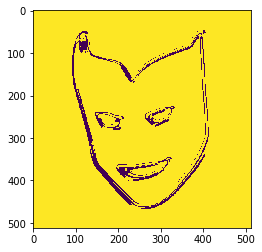

In [117]:
# A view of how the image looks like after implementing mask
import matplotlib.pyplot as plt
plt.imshow(original_mask)

##### Capturing a video, detecting a face and then overlaying the filter on top of it.

In [123]:
# read video
cap = cv2.VideoCapture(0)
ret, img = cap.read()
img_h, img_w = img.shape[:2]

while True:
    
    #read each frame of the video and convert it to gray
    ret, img = cap.read()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find faces in image using classifier
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # For every face found 
    for (x,y,w,h) in faces:
        
        # Coordinates of face region
        face_w = w
        face_h = h
        face_x1 = x
        face_x2 = face_x1+face_w
        face_y1 = y
        face_y2 = face_y1 + face_h
        
        # neon_filter size in relation to face by scaling
        neon_width = int(1.5* face_w)
        neon_height = int(neon_width * original_neon_h / original_neon_w )
        
        #setting location of coordinates of witch
        neon_x1 = face_x2 - int(face_w/2) - int(neon_width/2)
        neon_x2 = neon_x1 + neon_width
        neon_y1 = face_y2 - int(face_h/2) - int(neon_height/2) #face_y1 - int(face_h*1.25)
        neon_y2 = neon_y1 + neon_height 

        #check to see if out of frame
        if neon_x1 < 0:
            neon_x1 = 0
        if neon_y1 < 0:
            neon_y1 = 0
        if neon_x2 > img_w:
            neon_x2 = img_w
        if neon_y2 > img_h:
            neon_y2 = img_h

        #Account for any out of frame changes
        neon_width = neon_x2 - neon_x1
        neon_height = neon_y2 - neon_y1

        #resize witch to fit on face
        neon = cv2.resize(neon, (neon_width,neon_height), interpolation = cv2.INTER_AREA)
        mask = cv2.resize(original_mask, (neon_width,neon_height), interpolation = cv2.INTER_AREA)
        mask_inv = cv2.resize(original_mask_inv, (neon_width,neon_height), interpolation = cv2.INTER_AREA)

        #take ROI for witch from background that is equal to size of neon image
        roi = img[neon_y1:neon_y2, neon_x1:neon_x2]

        #original image in background (bg) where witch is not
        roi_bg = cv2.bitwise_and(roi,roi,mask = mask)
        roi_fg = cv2.bitwise_and(neon,neon,mask=mask_inv)
        dst = cv2.add(roi_bg,roi_fg)

        #put back in original image
        img[neon_y1:neon_y2, neon_x1:neon_x2] = dst


        break
    #display image
    cv2.imshow('img',img) 

    #if user pressed 'q' break
    if cv2.waitKey(1) == ord('q'): # 
        break;

cap.release() #turn off camera 
cv2.destroyAllWindows() #close all windows